# U.S. Medical Insurance Costs

***
## Overview

In this project, I will analyze the medical insurance data of 1338 people. The question I want to answer is: <br>**Is there a linear correlation between age, sex, bmi, children, smoking and region and insurance costs for individuals?**

Since this project will act as an introduction into statistical analysis in python for me, I will be using some more long-winded methods to further my understanding of the syntax. One such example is reading a csv file to a dictionary instead of into a DataFrame using pandas pd.read_csv.

The dataset was taken from [Kaggle](https://www.kaggle.com/datasets/mirichoi0218/insurance).
***

### Table of contents
1. [Setting Up Dataset](#Setting-Up-Dataset)
2. [Supplementary Methods](#Supplementary-Methods)
3. [Understanding potential biases and weaknesses of the dataset](#Understanding-potential-biases-and-weaknesses-of-the-dataset)
4. [Filtering out Extreme Outliers](#Filtering-out-Extreme-Outliers)
5. [Single Linear Regression](#Single-Linear-Regression)
6. [Multiple Linear Regression](#Multiple-Linear-Regression)
7. [Decision Tree](#Decision-Tree)
8. [Results](#Results)
9. [Conclusion](#Conclusion)
***

## Setting Up Dataset

First, the data needs to be loaded from a csv file into a Python dictionary. This can be done using the package csv's DictReader method.

In [1]:
import csv
import json

insurance_dict = {}
with open("insurance.csv", "r") as insurance_file:
    insurance_csv = csv.DictReader(insurance_file)
    index = 0
    for person in insurance_csv:
        insurance_dict[index] = person 
        index += 1

# First person in the insurance dict:
print(insurance_dict[0])

{'age': '19', 'sex': 'female', 'bmi': '27.9', 'children': '0', 'smoker': 'yes', 'region': 'southwest', 'charges': '16884.924'}


***
## Supplementary Methods

As a lot of the supplementary methods involve analyzing the different attributes, it is extremely useful to have a function that prints a comprehensive error message when an attribute is invalid.

In [2]:
def invalid_attribute_message(attribute:str, dictionary=insurance_dict):
    """ This function provides an error message when an attribute is invalid
    """
    print(str(attribute) + " is not a valid attribute. Check for correct spelling.")
    print("The valid attributes are : ")
    for key in dictionary[0].keys():
            print("- " + key)

It is useful to have a function which collects solely the values associated with a certain attribute!

In [3]:
def get_list_of_attribute(attribute:str, dictionary=insurance_dict)-> list:
    """ This function takes all the values associated with a given key (attribute) and appends them to a list.
    """
    attr_list : list = []
    try:
        for value in dictionary.values():
            attr_list.append(value[attribute.lower().strip()])
        return attr_list
    except:
        invalid_attribute_message(attribute)
# Example of invalid attribute
get_list_of_attribute("Name")

Name is not a valid attribute. Check for correct spelling.
The valid attributes are : 
- age
- sex
- bmi
- children
- smoker
- region
- charges


Similarly, a function which counts the number of each unique value associated with a variable is helpful for further analysis. For instance, this function can be used to find how many people in the dataset are smokers opposed to non-smokers.

In [4]:
def get_count_of_attribute(attribute:str, dictionary=insurance_dict)-> dict:
    """ This function allows for the count of different attributes to be constructed as a dict.
    """
    attribute_dict = {}
    try:
        for value in dictionary.values():
            attribute_dict[value[attribute]] = attribute_dict.get(value[attribute], 0) + 1
        return attribute_dict
    except:
        invalid_attribute_message(attribute)

# Examples
print(get_count_of_attribute("region"))
print(get_count_of_attribute("sex"))
print(get_count_of_attribute("smoker"))
print(get_count_of_attribute("children"))

{'southwest': 325, 'southeast': 364, 'northwest': 325, 'northeast': 324}
{'female': 662, 'male': 676}
{'yes': 274, 'no': 1064}
{'0': 574, '1': 324, '3': 157, '2': 240, '5': 18, '4': 25}


The print_person function serves to present data in a more easily readable manner.

In [5]:
def print_person(person):
    """ This function provides a compact sentence of a person's data.
    """
    smoker = "smoker" if person["smoker"] == "yes" else "non-smoker"
    print("A {age} year old {sex} {smoker} with a bmi of {bmi} and {children} children who lives in {region} pays ${charges}".format(age=person["age"], sex=person["sex"], bmi=person["bmi"], children=person["children"], smoker=smoker, region=person["region"], charges=person["charges"]))

print_person(insurance_dict[0])

A 19 year old female smoker with a bmi of 27.9 and 0 children who lives in southwest pays $16884.924


Functions for further dissecting and grouping the data is vital when carrying out a thorough analysis. Therefore, this function allows for all the people who fall under a specific value of an attribute to be appended to a list. An example of this can be seen at the end, where all the people with `5 children` are saved.

In [6]:
def get_specific_attribute(attribute, specific_data, dictionary=insurance_dict):
    """ This function gets a list of all the people who have a specific data under an attribute. 
        For example, all people who have 5 children
    """
    specific_attr = []
    try:
        for person in dictionary.values():
            if person[attribute] == specific_data:
                specific_attr.append(person)
    except:
        print(invalid_attribute_message[attribute])
    return specific_attr
print(get_specific_attribute("children", "5"))

[{'age': '19', 'sex': 'female', 'bmi': '28.6', 'children': '5', 'smoker': 'no', 'region': 'southwest', 'charges': '4687.797'}, {'age': '31', 'sex': 'male', 'bmi': '28.5', 'children': '5', 'smoker': 'no', 'region': 'northeast', 'charges': '6799.458'}, {'age': '20', 'sex': 'female', 'bmi': '37', 'children': '5', 'smoker': 'no', 'region': 'southwest', 'charges': '4830.63'}, {'age': '25', 'sex': 'male', 'bmi': '23.9', 'children': '5', 'smoker': 'no', 'region': 'southwest', 'charges': '5080.096'}, {'age': '45', 'sex': 'male', 'bmi': '24.31', 'children': '5', 'smoker': 'no', 'region': 'southeast', 'charges': '9788.8659'}, {'age': '52', 'sex': 'female', 'bmi': '46.75', 'children': '5', 'smoker': 'no', 'region': 'southeast', 'charges': '12592.5345'}, {'age': '49', 'sex': 'female', 'bmi': '31.9', 'children': '5', 'smoker': 'no', 'region': 'southwest', 'charges': '11552.904'}, {'age': '33', 'sex': 'male', 'bmi': '42.4', 'children': '5', 'smoker': 'no', 'region': 'southwest', 'charges': '6666.243

It is also statistically non-trivial to attain the maximum and minimum values of the dataset.

In [7]:
def get_max_val(attribute, dictionary=insurance_dict):
    """ This function attains a dict containing the people with the max value of a given attribute, as well as the
        maximum value.
    """
    max_value = 0
    max_dict = []
    try:
        for insurance in dictionary.values():
            max_value = float(insurance[attribute]) if max_value < float(insurance[attribute]) else max_value
    except:
        invalid_attribute_message(attribute)
        return
    
    for insurance in dictionary.values():
        if float(insurance[attribute]) == max_value:
            max_dict.append(insurance)
            
    return max_dict, max_value

max_dict, max_val = get_max_val("charges")
for person in max_dict:
    print_person(person)
    
max_dict, max_val = get_max_val("bmi")
for person in max_dict:
    print_person(person)

max_dict, max_val = get_max_val("age")
print("The oldest person is " + str(max_val) + " years old")

A 54 year old female smoker with a bmi of 47.41 and 0 children who lives in southeast pays $63770.42801
A 18 year old male non-smoker with a bmi of 53.13 and 0 children who lives in southeast pays $1163.4627
The oldest person is 64.0 years old


In [8]:
def get_min_val(attribute, dictionary=insurance_dict):
    """ This function attains a dict containing the people with the min value of a given attribute, as well as the
        minimum value.
    """
    min_value = float("inf")
    min_dict = []
    try:
        for insurance in dictionary.values():
            min_value = float(insurance[attribute]) if min_value > float(insurance[attribute]) else min_value
    except:
        invalid_attribute_message(attribute)
        return
    
    for insurance in dictionary.values():
        if float(insurance[attribute]) == min_value:
            min_dict.append(insurance)
            
    return min_dict, min_value

min_dict, min_val = get_min_val("charges")
for person in min_dict:
    print_person(person)
    
min_dict, min_val = get_min_val("bmi")
for person in min_dict:
    print_person(person)

A 18 year old male non-smoker with a bmi of 23.21 and 0 children who lives in southeast pays $1121.8739
A 18 year old male non-smoker with a bmi of 15.96 and 0 children who lives in northeast pays $1694.7964


It is also helpful to be able to sort the dictionary based on a given attribute and to create the 4 quartiles based on an attribute.

In [9]:
def sort_dict_by_attr(attribute:str, dictionary=insurance_dict):
    """ This function returns a dict sorted by the various values an attribute can have.
    """
    sorted_dict = {}
    for insurance in dictionary.values():
        sorted_dict[insurance[attribute]] = sorted_dict.get(insurance[attribute], []) + [insurance]
    return {key : sorted_dict[key] for key in sorted(sorted_dict)}


def create_quartiles(attribute:str, dictionary=insurance_dict):
    """ This function splits the dict into the 4 quartiles according to the values connected to the given attribute.
    """
    quartile_list = [[] for i in range(4)]
    current_entry = 1
    num_entries = len(insurance_dict.values())
    index = 0
    for dicts in sort_dict_by_attr(attribute, dictionary).values():
        for insurance in dicts:
            if current_entry % (num_entries//4 + 1) == 0:
                index += 1
            quartile_list[index].append(insurance)
            current_entry += 1
    return quartile_list

***
## Understanding potential biases and weaknesses of the dataset
When conducting analyses on a given dataset, it is essential to fully understand the scope of the data. Are there any factors that could **skew** the results?

In order to tackle this issue, I will first get an intuitive understanding of the set through various figures and diagrams. Later on, I will examine the data using statistical techniques.

In [10]:
from matplotlib import pyplot as plt
import numpy as np

In [11]:
def attribute_piechart(attributes, dictionary=insurance_dict):
    """ This function allows for efficient creation of pie charts for one or more attributes of the dataset.
    """
    attributes = [attributes] if type(attributes) == str else attributes
    categories_of_attributes = []
    categories_data = []
    try:
        for attribute in attributes:
                categories_of_attributes.append(get_count_of_attribute(attribute.lower(), dictionary).keys())
                categories_data.append(get_count_of_attribute(attribute.lower(), dictionary).values())
    except:
        return
    # Create plot
    fig, axs = plt.subplots(1, len(attributes), figsize = (9, 3), sharey=True)
    for i in range(len(attributes)):
        ax = axs[i] if len(attributes) > 1 else axs
        ax.pie(categories_data[i], labels = categories_of_attributes[i])
        ax.set_title("Distribution of " + str(attributes[i]) + " data")
    # Show plot
    plt.show()

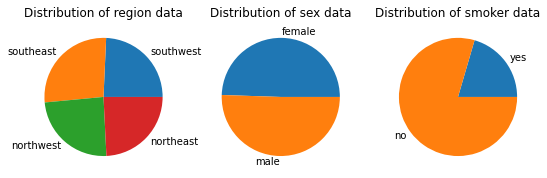

In [12]:
attributes = ["region", "sex", "smoker"]
attribute_piechart(attributes)

As seen in the *pie charts*, there is approximately an even distribution between the data of the various regions and sexes. However, as the distribution of smoker data demonstrates, the data is skewed to include over 75% non-smokers. This uneven distribution may be more representative of the US population; however, it may also reduce our accuracy when looking at correlations between smokers and insurance charges.

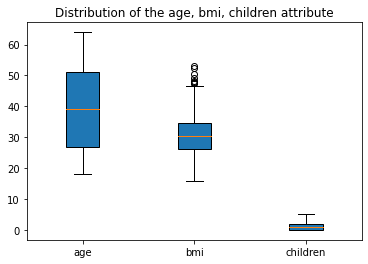

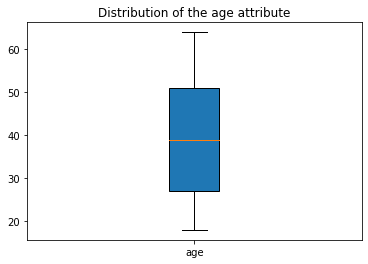

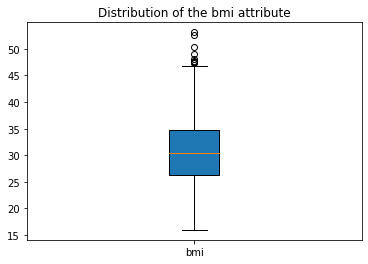

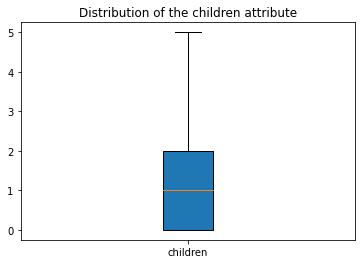

In [13]:
# Another option for creating boxplots is through seaborn's boxplot. Here, a datafram would have to be sent as the data.
def create_boxplot(attributes, dictionary=insurance_dict):
    """ This function allows for efficient creation of pie charts for one or more attributes of the dataset.
    """
    attributes = [attributes] if type(attributes) == str else attributes
    categories_data = [[] for i in range(len(attributes))] 
    for i in range(len(attributes)):
        for value in get_list_of_attribute(attributes[i], dictionary):
            categories_data[i].append(float(value))
        
    # Create plot
    plt.boxplot(categories_data, vert=True, patch_artist=True, labels=attributes)
    plt.title("Distribution of the " + str(", ".join(attributes)) + " attribute")
    # Show plot
    plt.show()

attributes = ["age", "bmi", "children"]
create_boxplot(attributes)
for attribute in attributes:
    create_boxplot(attribute)

Through the box and whisker plots, the span/variation of numerical data becomes more apparent, as well as its distribution. 

The data gathered on age is between age 18 and 64 and has a seemingly uniform distribution. A uniform age distribution can be important in understanding a population, although not always representative. Some countries/regions have **constrictive population pyramids**, where there are a majority of elderly in comparison to younger people. However, an accurate representation of a population doesn't necessarily help the understanding of the different factors going into insurance pricing. Therefore, the researchers presumably decided to try and evenly gather data of different age groups.

Similarly, the data gathered on bmi is spread relatively evenly. However, here a different problem occurs. The dataset has numerous outliers. These can be found by looking outside of the bounds:
$$ Outlier \not\in [Q1 - 1.5 * IQR, Q3 + 1.5 * IQR] $$ <br> where `IQR` stands for interquartile range or the difference between Q3 and Q1. <br><br> In this project, a linear trend between the different attributes and insurance cost is to be investigated. The presence of outlier could significantly skew the results for non-extreme values. Therefore, an analysis of the data with the outliers and one where extreme outliers are filtered and removed will be performed.

Finally, a boxplot was created to visualize the data on how many children each person has. Here, the plot shows that a majority (50%) has 0 or 1 children and 75% has 2 or less. The data again seems skewed to include more people with less children; however, this is most likely reflective of the population.

***
## Filtering out Extreme Outliers
As discussed earlier, in order to create more robust statistics, extreme outliers (over 2 * IQR outside of the 1st or 3rd quartile) will be trimmed out.

$$ Extreme \space outlier \not\in [Q1 - 2 * IQR, \space \space  Q3 + 2 * IQR] $$

As opposed to all outliers, these extreme outliers exists over 2 times the interquartile range away from their quartiles. <br>
Below, the numpy method quantile is used in order to determine the value of the quartiles. However, the method written in [Supplementary Methods](#Supplementary-Methods) called `create_quartiles` could also be used.

In [14]:
bmi_values = []
for value in get_list_of_attribute("bmi"):
    bmi_values.append(float(value))
#1st Quartile 
q1 = np.quantile(bmi_values, 0.25) 
#3rd Quartile 
q3 = np.quantile(bmi_values, 0.75) 

IQR = q3 - q1

extreme_outlier = [q1 - 2 * IQR, q3 + 2 * IQR]
print(extreme_outlier)

[9.501249999999999, 51.48875]


Now that the extreme_outlier intervals for the `bmi` attribute has been calculated. The data that falls outside the interval can be filtered out.

In [15]:
filtered_insurance_dict = {}
for key in insurance_dict:
    bmi_value = float(insurance_dict[key]["bmi"])
    if extreme_outlier[0] <= bmi_value <= extreme_outlier[1]:
        filtered_insurance_dict[key] = insurance_dict[key]
print("{removed} entries were filtered out!".format(removed = str(len(insurance_dict)-len(filtered_insurance_dict))))

2 entries were filtered out!


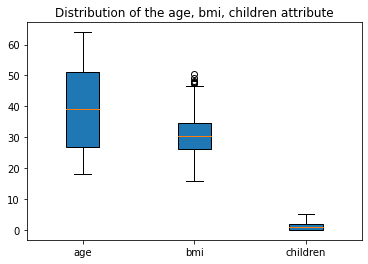

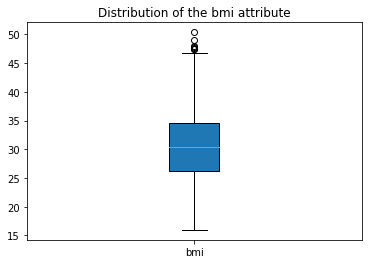

In [20]:
attributes = ["age", "bmi", "children"]
create_boxplot(attributes, filtered_insurance_dict)
create_boxplot("bmi", filtered_insurance_dict)


The new, filtered insurance data has fewer outliers when looking at bmi, as well as maintained the robustness of the age and children attributes. Moving forward, both datasets (filtered and unfiltered) will be used in the investigation of trends.

## Single Linear Regression
Although it seems intuitive that all the factors play some role in determining the insurance costs, it is important to be thorough when performing statistical analysis. Therefore, a simple linear regression will be performed and the impact of each attribute determined. Later on, a multiple linear regression will also be constructed in order to create a model which incorporates all the different factors.

In this section, attributes will be investigated individually. Therefore, the linear model will take the following form:

$$ y_i = \beta_0 + \beta_1 * x_i $$

where `beta_0` is the y-intercept and `beta_1` is the slope of the line.


Before diving completely into the regressions, it is more efficient to use DataFrames. Hence, the dictionaries need to be altered.

In [52]:
import pandas as pd
import seaborn as sns
import statsmodels.api as sms 
import statsmodels.formula.api as smf 

smoker_status = {'no' : 0, 'yes' : 1}

def prepare_dict_for_df(dictionary):
    """ This function aids in turning a dictionary into a dataframe.
    """
    temp_dict = {"age" : [],
                "sex" : [],
                "bmi" : [],
                "children" : [],
                "smoker" : [],
                "region" : [],
                "charges" : []}
    for person in dictionary.values():
        for attribute in person:
            try:
                temp_dict[attribute].append(float(person[attribute]))
            except:
                temp_dict[attribute].append(smoker_status.get(person[attribute], person[attribute]))
    return temp_dict

# Creating dataframe from dictionaries
insurance_df = pd.DataFrame.from_dict(prepare_dict_for_df(insurance_dict))


filtered_insurance_df = pd.DataFrame.from_dict(prepare_dict_for_df(filtered_insurance_dict))

insurance_df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19.0,female,27.900,0.0,1,southwest,16884.92400
1,18.0,male,33.770,1.0,0,southeast,1725.55230
2,28.0,male,33.000,3.0,0,southeast,4449.46200
3,33.0,male,22.705,0.0,0,northwest,21984.47061
4,32.0,male,28.880,0.0,0,northwest,3866.85520


First, a linear regression of age is done.

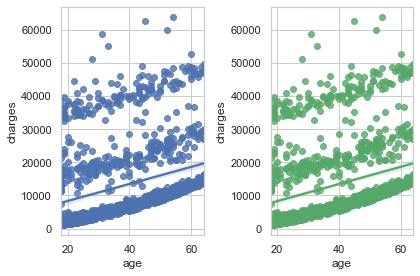

In [61]:
sns.set(style = 'whitegrid', font_scale = 1)
# Linear regression of age vs. charge using the unfiltered insurance data
plt.subplot(1, 2, 1)
sns.regplot(x='age', y='charges', data=insurance_df) 
# plt.ylim(290,510) 

# Linear regression of age vs. charge using the filtered insurance data
plt.subplot(1, 2, 2) 
sns.regplot(x='age', y='charges', color ="g", data=filtered_insurance_df) 
# plt.ylim(290,510) 

plt.tight_layout()
plt.show()

In [62]:
insurance_model = smf.ols('charges~age', data=insurance_df).fit()
insurance_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           4.89e-29
Time:                        12:02:51   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [63]:
filtered_insurance_model = smf.ols('charges~age', data=filtered_insurance_df).fit()
filtered_insurance_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     133.4
Date:                Sun, 08 Jan 2023   Prob (F-statistic):           1.75e-29
Time:                        12:02:53   Log-Likelihood:                -14389.
No. Observations:                1336   AIC:                         2.878e+04
Df Residuals:                    1334   BIC:                         2.879e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   3073.5408    936.247      3.283      0.001    1236.864    4910.217
age          259.5225     22.468     11.551      0.000     215.446     303.599
==============================================================================
Omnibus:                      399.716   Durbin-Watson:                   2.028
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              866.005
Skew:                           1.734   Prob(JB):                    8.90e-189
Kurtosis:                       4.878   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From the linear regression, as well as the data surrounding the model, it becomes apparent that age is a contributing but minor factor in the overall determinance of the cost of insurance. In the summary of the regression model, the unfiltered data had an `R-squared` of 0.089 and the filtered data had an `R-squared` of 0.091. 

The R-squared variable is known as the coefficient of determination. It shows how much the dependent variable, `age`, determines the values of the independent variable, `charges`. The closer to 1 r-squared is, the more the dependent variable determines y. Therefore, as stated earlier, age is **a** factor; however, it does not strongly determine y.

The **estimated regression equation**, found through the `coef` variable in the table, is:

$$ \hat{y}_i = 3073.5408 + 259.5225 * x_i $$

Now, a regression on bmi will be done.

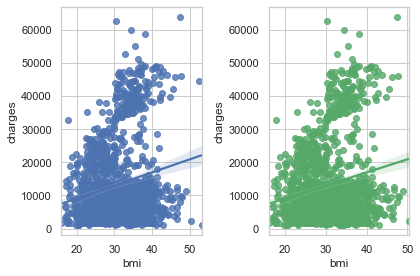

In [64]:
sns.set(style = 'whitegrid', font_scale = 1)
# Linear regression of age vs. charge using the unfiltered insurance data
plt.subplot(1, 2, 1)
sns.regplot(x='bmi', y='charges', data=insurance_df) 
# plt.ylim(290,510) 

# Linear regression of age vs. charge using the filtered insurance data
plt.subplot(1, 2, 2) 
sns.regplot(x='bmi', y='charges', color ="g", data=filtered_insurance_df) 
# plt.ylim(290,510) 

plt.tight_layout()
plt.show()

There doesn't visually appear to be a strong correlation between bmi and the charges, other than a slight positive correlation. However, to make sure, the r-squared of the data will be calculated.

In [82]:
insurance_model = smf.ols('charges~bmi', data=insurance_df).fit()
insurance_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     54.71
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           2.46e-13
Time:                        10:00:12   Log-Likelihood:                -14451.
No. Observations:                1338   AIC:                         2.891e+04
Df Residuals:                    1336   BIC:                         2.892e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1192.9372   1664.802      0.717      0.474   -2072.974    4458.849
bmi          393.8730     53.251      7.397      0.000     289.409     498.337
==============================================================================
Omnibus:                      261.030   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              431.091
Skew:                           1.297   Prob(JB):                     2.45e-94
Kurtosis:                       4.004   Cond. No.                         160.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
filtered_insurance_model = smf.ols('charges~bmi', data=filtered_insurance_df).fit()
filtered_insurance_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.039
Model:                            OLS   Adj. R-squared:                  0.038
Method:                 Least Squares   F-statistic:                     53.68
Date:                Wed, 11 Jan 2023   Prob (F-statistic):           4.08e-13
Time:                        09:42:08   Log-Likelihood:                -14427.
No. Observations:                1336   AIC:                         2.886e+04
Df Residuals:                    1334   BIC:                         2.887e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1207.1256   1676.244      0.720      0.472   -2081.236    4495.487
bmi          393.3697     53.691      7.326      0.000     288.041     498.699
==============================================================================
Omnibus:                      263.459   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              437.521
Skew:                           1.305   Prob(JB):                     9.85e-96
Kurtosis:                       4.023   Cond. No.                         162.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Contra to expectations, bmi has a lower level of determination than age on charges. Both the filtered and unfiltered data had an r-squared of 0.039. These numbers indicate that there is another factor with more impact on insurance cost.

### Confidence of Model

Even though the low r-squared is an indication of a poor model, a further statistical analysis is necessary to rule it out. Models are never completely accurate, hence being a model of the real phenomenon. However, through analyzing the confidence intervals, the extent to which the model predicts correctly can be determined.

In [ ]:
# Look at smoking and try and find a way to analyze 0 or 1 data.

## Multiple Linear Regression

A multiple linear regression allows for a linear model to be created through weighting different variables, hence multiple. Therefore, the **estimared regression equation** becomes: <br>

$$ y_i = \beta_0 + \beta_1 * x_1 + \beta_2 * x_2 + ... + \beta_n * x_n + e $$

Where where `beta_0` is the y-intercept, `e` is the standard error, and `beta_(1-n)` creates the slope of the line.

In [2]:
print(insurance_df.head())
#predictor_data = pd.DataFrame(np.c_[insurance_df[]])

NameError: name 'insurance_df' is not defined

In [17]:


# Linear regression
# Here, I should check the R-squared, etc...
# Possibility of decision trees to interpolate an insurance cost. Then, I could do a comparison to the real.
# From there, I could perform multiple statistical tests in order to get an overview of the accuracy of such modelling.

## Decision Tree

## Results

## Conclusion

## Further Works

## Reflection

One thing I learned through doing this project is that it is very beneficial to be working with dataframes. A lot of well-known and efficient libraries for data analysis use the data type DataFrame instead of the built-in dictionaries. Therefore, when reading from the csv at the start, the data could've been made into a DataFrame immediately.